<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression-example" data-toc-modified-id="Regression-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression example</a></span></li><li><span><a href="#Recreating-using-Scikit-Learn" data-toc-modified-id="Recreating-using-Scikit-Learn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recreating using Scikit-Learn</a></span><ul class="toc-item"><li><span><a href="#First-using-the-root-mean-square-error-in-the-loss-function" data-toc-modified-id="First-using-the-root-mean-square-error-in-the-loss-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>First using the root mean square error in the loss function</a></span></li><li><span><a href="#Try-with-different-metric---the-one-norm-(or-rather-the-Mean-Absolute-Error)" data-toc-modified-id="Try-with-different-metric---the-one-norm-(or-rather-the-Mean-Absolute-Error)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Try with different metric - the one-norm (or rather the Mean Absolute Error)</a></span></li></ul></li><li><span><a href="#Recreating-using-TensorFlow" data-toc-modified-id="Recreating-using-TensorFlow-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Recreating using TensorFlow</a></span><ul class="toc-item"><li><span><a href="#First-using-the-root-mean-square-error-in-the-loss-function" data-toc-modified-id="First-using-the-root-mean-square-error-in-the-loss-function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>First using the root mean square error in the loss function</a></span></li><li><span><a href="#Try-with-different-metric---the-one-norm-(or-rather-the-Mean-Absolute-Error)" data-toc-modified-id="Try-with-different-metric---the-one-norm-(or-rather-the-Mean-Absolute-Error)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Try with different metric - the one-norm (or rather the Mean Absolute Error)</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
%precision 6
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

## Regression example

Here we compare our linear regression results obtained using an optimisation algorithm applied to different misfit functions (which we saw in lectures 4 and 5) with results obtained using SKLearn and TensorFlow.

Note that the TF code below is based on <https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/programming-exercises>

First let's repeat the linear regression seen in lectures.

Note I'm using random data, so if you compate your results against mine, or your colleagues, then you will expect to see slightly different results.

In [2]:
# Invent some raw data - we will use the notation (xi,yi) for the
# given data, where xi and yi are of length N+1 (N=len(xi)-1)


#xi = np.linspace(0,1,10)
#yi = xi +  0.2 * np.random.random((10,))

In [3]:
xi = np.linspace(0,1,10)
yi = np.array([0.032965, 0.248166, 0.421453, 0.38419, 0.620941, 0.692105, 0.733999, 0.873669, 1.031932, 1.133736])

print(xi)
print(yi)

[0.       0.111111 0.222222 0.333333 0.444444 0.555556 0.666667 0.777778
 0.888889 1.      ]
[0.032965 0.248166 0.421453 0.38419  0.620941 0.692105 0.733999 0.873669
 1.031932 1.133736]


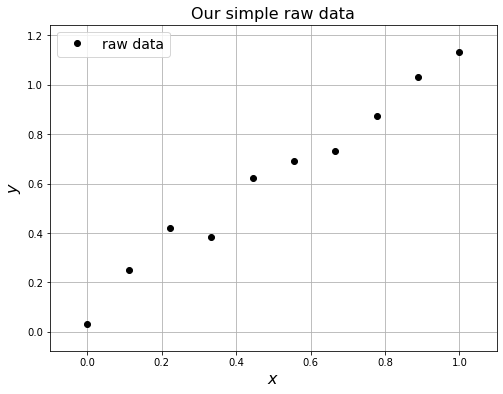

In [4]:
# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
# [Note that I've been a bit lazy in later lectures and really should
# do this sort of thing more often to make code easier to read - apologies]
def plot_raw_data(xi, yi, ax):
    """Plot x vs y on axes ax, 
    add axes labels and turn on grid

    Parameters
    ----------
    xi : array_like
        Array containing x data
    yi : array_like
        Array containing y data
    ax :  matplotlib axes, optional
        The axes to plot on
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
# loc='best' means we let matplotlib decide the best place for the
# legend to go.  For other options see 
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

poly_coeffs:  [1.024089 0.105271]


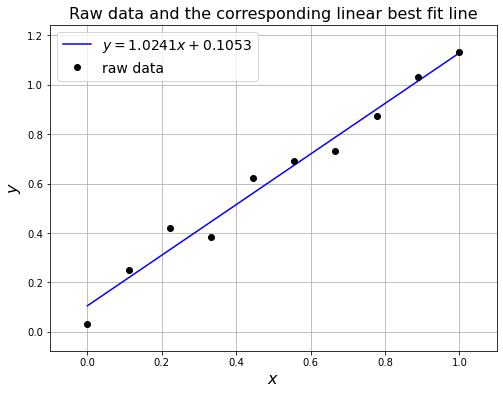

In [5]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (xi, yi) data from above
# we'll explain what's going on here later in this lecture
degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
print('poly_coeffs: ',poly_coeffs)

# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
x = np.linspace(0., 1, 100)

ax1.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=14)

# add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=16);

We have used NumPy's polynomial fitting function which "minimises the squared error" <https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html>

i.e. it seeks the polynomial (here we chose just a straight line) which minimises the two-norm of the errors at the locations where we have data.

[Don't worry about the details too much here, we'll go over these methods in detail in later lectures].


We can code this up ourselves using SciPy, and in doing so check that our code recreates above when we choose the two-norm, but also see what happens if we select other norms with which to define the best fitting line - we need to code it up ourselves to allow us to change the norm!

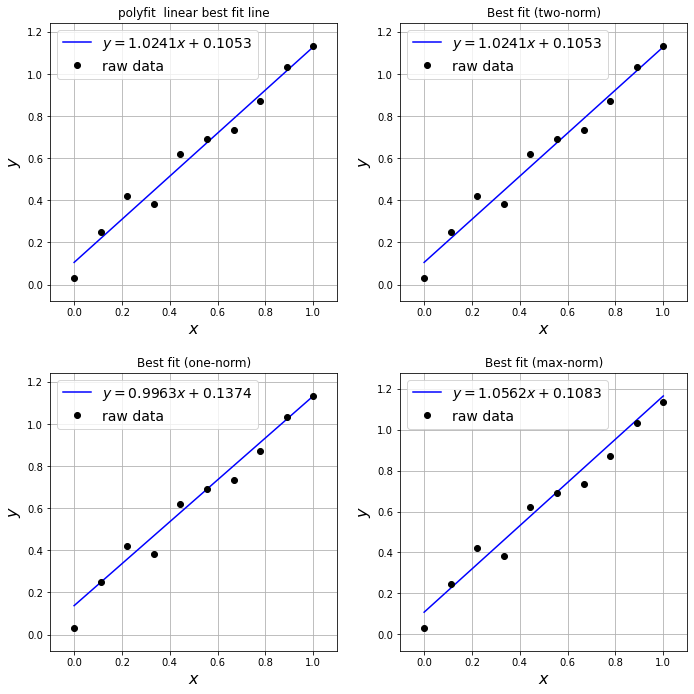

In [6]:
from scipy.optimize import minimize

def line_fit(x, line_coeffs):
    """
    Calculate y values for a given line and given x values

    Parameters
    ----------
    x : array_like
        Array containing x data
    line_coeffs : array_like
        Array containing gradient and constant

    """
    return line_coeffs[0]*x + line_coeffs[1]

def cost_fun(line_coeffs, x, y, norm):
    """Cost function using two, one or max-norm

    Parameters
    ----------
    line_coeffs : array_like
        Array containing gradient and constant
    x : array_like
        Array containing x data
    y : array_like
        Array containing y data
    norm : string
        'two' for two-norm, 'one' for one-norm, 'max' for max-norm
    """
    if norm=='two':
        return sl.norm(y - line_fit(x, line_coeffs), 2)
    elif norm=='one':
        return sl.norm(y - line_fit(x, line_coeffs), 1)
    elif norm=='max':
        return sl.norm(y - line_fit(x, line_coeffs), np.inf)
    else:
        raise ValueError('check your norm string')

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))

# polyfit line
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)
        
# minimise two-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

# minimise one-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

# minimise max-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

Note that our code recreates the `numpy.polyfit` result when we choose the two-norm. Note also that we get slightly different results when we use the one-norm or the max-norm.

These results are all equally valid. The fact that `numpy.polyfit` implements the two-norm without giving us the ability to change the norm highlights that so-called "least squares" fitting is by far the most common approach, but there may be situations where the other norms are beneficial.

Let's see what happens when we perturb a single entry - this is motivated by a situation where maybe one of our sensors failed and gave a spurious result.

error in RMS case:  0.27600043969843546
error in two-norm case:  0.872790024655014
and if we divide this by sqrt(N) to turn this into an RMS error:  0.27600043969843596
error in one-norm case:  1.3779148159669292
and if we divide this by N to turn this into a MAE:  0.1377914815966929
error in inf-norm case:  0.5079958650731129


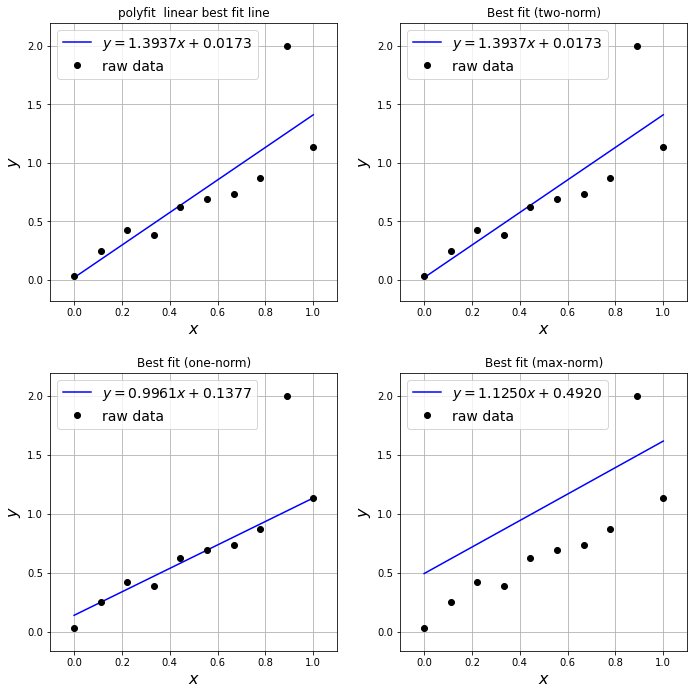

In [7]:
# perturb one of the entries - imagine it's corrupted or subject to major measurement error

yi[8] = 2.

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))

# polyfit line
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)
# print out the error
print('error in RMS case: ', sl.norm(yi - p1(xi)) / np.sqrt(len(yi)))

# minimise two-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)
# print out the error
print('error in two-norm case: ', sl.norm(yi - p1(xi), 2))
print('and if we divide this by sqrt(N) to turn this into an RMS error: ', sl.norm(yi - p1(xi), 2)/np.sqrt(len(xi)) )

# minimise one-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)
# print out the error
print('error in one-norm case: ', sl.norm(yi - p1(xi), 1))
print('and if we divide this by N to turn this into a MAE: ', sl.norm(yi - p1(xi), 1)/(len(xi)) )

# minimise max-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)
# print out the error
print('error in inf-norm case: ', sl.norm(yi - p1(xi), np.inf))

plt.tight_layout(pad = 2.0)



If you compare the resulting slopes of the best fit lines, between this case with the outlier with the previous slopes without the outlier, you should see that the one-norm is by far the least impacted while the max-norm is the most impacted.

These sorts of issues will be important in the modules on **Inversion & Optimisation** and **Machine Learning**.

## Recreating using Scikit-Learn

Let's see if we can recreate the above slopes and intercept values using the Scikit-Learn library.

### First using the root mean square error in the loss function

Following <https://scikit-learn.org/stable/modules/linear_model.html>

See also <https://stackabuse.com/linear-regression-in-python-with-scikit-learn/>

In [8]:
from sklearn import linear_model
from sklearn import metrics

In [9]:
reg = linear_model.LinearRegression(fit_intercept=True)

reg.fit(xi[:, np.newaxis], yi)

print('slope: ', reg.coef_[0])
print('intercept: ', reg.intercept_)
print('MSE: ', metrics.mean_squared_error(yi, reg.predict(xi[:, np.newaxis])))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(yi, reg.predict(xi[:, np.newaxis]))))

slope:  1.3937153454545457
intercept:  0.01726472727272721
MSE:  0.07617624271372973
RMSE:  0.2760004396984355


### Try with different metric - the one-norm (or rather the Mean Absolute Error)

As described here <https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html>

"...QuantileRegressor with quantile=0.5 minimizes the mean absolute error (MAE)..."

In [10]:
from sklearn import metrics

reg = linear_model.QuantileRegressor(fit_intercept=True, quantile=0.5, alpha=0.0)

reg.fit(xi[:, np.newaxis], yi)

print('slope: ', reg.coef_[0])
print('intercept: ', reg.intercept_)
print('MAE: ', metrics.mean_absolute_error(yi, reg.predict(xi[:, np.newaxis])))

slope:  0.9962662499449234
intercept:  0.13746975010500495
MAE:  0.1377587250167172


## Recreating using TensorFlow

Now let's see if we can get TensorFlow to recreate the "slope", "intercept" and "misfit error" in the case of the RMS or least squares error.

In the language of ML we talk about "weight", "bias" and "loss function".


### First using the root mean square error in the loss function

In [11]:
import pandas as pd

In [12]:
import tensorflow as tf

In [13]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [14]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [15]:
#my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
#my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

my_feature = xi
my_label   = yi


Epoch 1/10
1/1 [==============================] - 0s 420ms/step - loss: 0.0774 - root_mean_squared_error: 0.2783
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0770 - root_mean_squared_error: 0.2775
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0766 - root_mean_squared_error: 0.2767
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0765 - root_mean_squared_error: 0.2765
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0764 - root_mean_squared_error: 0.2764
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0763 - root_mean_squared_error: 0.2763
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0763 - root_mean_squared_error: 0.2762
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0763 - root_mean_squared_error: 0.2762
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2761

C:\Users\mdpig\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


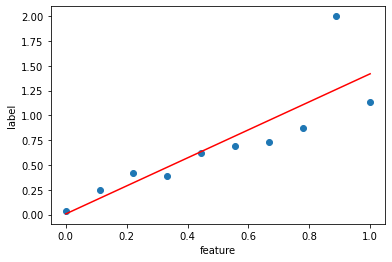

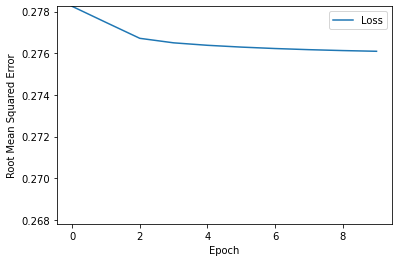

[[1.412967]]
[0.00676]
0.2760964035987854


In [16]:
learning_rate=0.01
epochs=10
my_batch_size=10

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

print(trained_weight)
print(trained_bias)
print(rmse.values[-1])

Let's see if we match the results above better if we run for more epochs and try to reduce the loss function further. 

Epoch 1/1000
1/1 [==============================] - 0s 413ms/step - loss: 0.2980 - root_mean_squared_error: 0.5459
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2771 - root_mean_squared_error: 0.5264
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2630 - root_mean_squared_error: 0.5128
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2518 - root_mean_squared_error: 0.5018
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2424 - root_mean_squared_error: 0.4923
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2341 - root_mean_squared_error: 0.4838
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2267 - root_mean_squared_error: 0.4761
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2199 - root_mean_squared_error: 0.4689
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2136 - root_mean_squ

1/1 [==============================] - 0s 2ms/step - loss: 0.0963 - root_mean_squared_error: 0.3103
Epoch 73/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0959 - root_mean_squared_error: 0.3098
Epoch 74/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0956 - root_mean_squared_error: 0.3093
Epoch 75/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0953 - root_mean_squared_error: 0.3087
Epoch 76/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0950 - root_mean_squared_error: 0.3082
Epoch 77/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0947 - root_mean_squared_error: 0.3077
Epoch 78/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0944 - root_mean_squared_error: 0.3072
Epoch 79/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0940 - root_mean_squared_error: 0.3067
Epoch 80/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0937 - root_mean_squared_er

1/1 [==============================] - 0s 2ms/step - loss: 0.0784 - root_mean_squared_error: 0.2799
Epoch 144/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0782 - root_mean_squared_error: 0.2797
Epoch 145/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0781 - root_mean_squared_error: 0.2795
Epoch 146/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0780 - root_mean_squared_error: 0.2793
Epoch 147/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0779 - root_mean_squared_error: 0.2791
Epoch 148/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0778 - root_mean_squared_error: 0.2790
Epoch 149/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0777 - root_mean_squared_error: 0.2788
Epoch 150/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0776 - root_mean_squared_error: 0.2786
Epoch 151/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0775 - root_mean_sq

1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 215/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 216/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 217/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 218/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 219/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 220/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 221/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 222/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 286/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 287/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 288/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 289/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 290/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 291/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 292/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 293/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 357/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 358/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 359/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 360/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 361/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 362/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 363/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 364/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 428/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 429/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 430/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 431/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 432/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 433/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 434/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 435/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 499/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 500/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 501/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 502/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 503/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 504/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 505/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 506/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 570/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 571/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 572/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 573/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 574/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 575/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 576/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 577/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 641/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 642/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 643/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 644/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 645/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 646/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 647/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 648/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 4ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 712/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 713/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 714/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 715/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 716/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 717/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 718/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 719/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 783/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 784/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 785/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 786/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 787/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 788/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 789/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 790/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 854/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 855/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 856/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 857/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 858/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 859/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 860/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 861/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 925/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 926/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 927/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 928/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 929/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 930/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 931/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 932/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_sq

1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 996/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 997/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 998/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 999/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760
Epoch 1000/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760


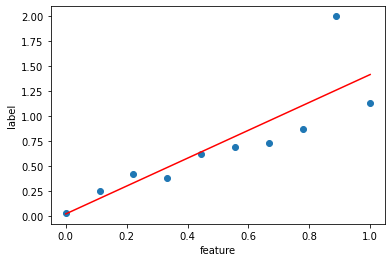

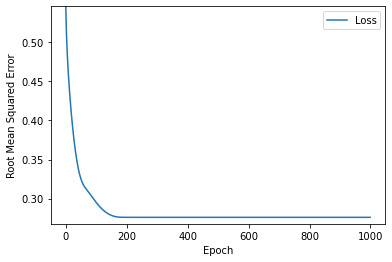

[[1.396215]]
[0.019765]
0.27602705359458923


In [17]:
learning_rate=0.005
epochs=1000
my_batch_size=10

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

print(trained_weight)
print(trained_bias)
print(rmse.values[-1])
# The loss curve suggests that the model does converge.

### Try with different metric - the one-norm (or rather the Mean Absolute Error)

Let's check our understanding by changing the "loss function", specifically the metric used to calculate the misfit to data, and confirm that we can get TensorFlow to recreate our one-norm result from above.

In [18]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_absolute_error",
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's MAE at each epoch. 
  mae = hist["mean_absolute_error"]

  return trained_weight, trained_bias, epochs, mae

print("Defined create_model and train_model")

Defined create_model and train_model


In [19]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, mae):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Absolute Error")

  plt.plot(epochs, mae, label="Loss")
  plt.legend()
  plt.ylim([mae.min()*0.97, mae.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/1000
1/1 [==============================] - 0s 362ms/step - loss: 0.8977 - mean_absolute_error: 0.8977
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8740 - mean_absolute_error: 0.8740
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8567 - mean_absolute_error: 0.8567
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.8431 - mean_absolute_error: 0.8431
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8331 - mean_absolute_error: 0.8331
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8237 - mean_absolute_error: 0.8237
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.8148 - mean_absolute_error: 0.8148
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.8063 - mean_absolute_error: 0.8063
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7980 - mean_absolute_error: 0.7980
Epoch 10/1000
1/1

1/1 [==============================] - 0s 3ms/step - loss: 0.4068 - mean_absolute_error: 0.4068
Epoch 76/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.4035 - mean_absolute_error: 0.4035
Epoch 77/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4001 - mean_absolute_error: 0.4001
Epoch 78/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3966 - mean_absolute_error: 0.3966
Epoch 79/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3931 - mean_absolute_error: 0.3931
Epoch 80/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3902 - mean_absolute_error: 0.3902
Epoch 81/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3882 - mean_absolute_error: 0.3882
Epoch 82/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3862 - mean_absolute_error: 0.3862
Epoch 83/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.3841 - mean_absolute_error: 0.3841
Epoch 84/1000
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.2665 - mean_absolute_error: 0.2665
Epoch 150/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2652 - mean_absolute_error: 0.2652
Epoch 151/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2637 - mean_absolute_error: 0.2637
Epoch 152/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2622 - mean_absolute_error: 0.2622
Epoch 153/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2610 - mean_absolute_error: 0.2610
Epoch 154/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2599 - mean_absolute_error: 0.2599
Epoch 155/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2584 - mean_absolute_error: 0.2584
Epoch 156/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2575 - mean_absolute_error: 0.2575
Epoch 157/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2560 - mean_absolute_error: 0.2560
Epoch 158/1000


1/1 [==============================] - 0s 2ms/step - loss: 0.1814 - mean_absolute_error: 0.1814
Epoch 223/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1805 - mean_absolute_error: 0.1805
Epoch 224/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1793 - mean_absolute_error: 0.1793
Epoch 225/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1780 - mean_absolute_error: 0.1780
Epoch 226/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1771 - mean_absolute_error: 0.1771
Epoch 227/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1760 - mean_absolute_error: 0.1760
Epoch 228/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1747 - mean_absolute_error: 0.1747
Epoch 229/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1738 - mean_absolute_error: 0.1738
Epoch 230/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1726 - mean_absolute_error: 0.1726
Epoch 231/1000
1

1/1 [==============================] - 0s 3ms/step - loss: 0.1385 - mean_absolute_error: 0.1385
Epoch 296/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1403 - mean_absolute_error: 0.1403
Epoch 297/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1385 - mean_absolute_error: 0.1385
Epoch 298/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1392 - mean_absolute_error: 0.1392
Epoch 299/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1395 - mean_absolute_error: 0.1395
Epoch 300/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1379 - mean_absolute_error: 0.1379
Epoch 301/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1400 - mean_absolute_error: 0.1400
Epoch 302/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1388 - mean_absolute_error: 0.1388
Epoch 303/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1382 - mean_absolute_error: 0.1382
Epoch 304/1000
1

1/1 [==============================] - 0s 3ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 369/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1396 - mean_absolute_error: 0.1396
Epoch 370/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1390 - mean_absolute_error: 0.1390
Epoch 371/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 372/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 373/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 374/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1398 - mean_absolute_error: 0.1398
Epoch 375/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1389 - mean_absolute_error: 0.1389
Epoch 376/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 377/1000
1

1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 442/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 443/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1382 - mean_absolute_error: 0.1382
Epoch 444/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1393 - mean_absolute_error: 0.1393
Epoch 445/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1391 - mean_absolute_error: 0.1391
Epoch 446/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 447/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1379 - mean_absolute_error: 0.1379
Epoch 448/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 449/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1395 - mean_absolute_error: 0.1395
Epoch 450/1000
1

1/1 [==============================] - 0s 2ms/step - loss: 0.1399 - mean_absolute_error: 0.1399
Epoch 515/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1384 - mean_absolute_error: 0.1384
Epoch 516/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1388 - mean_absolute_error: 0.1388
Epoch 517/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1393 - mean_absolute_error: 0.1393
Epoch 518/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 519/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 520/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1393 - mean_absolute_error: 0.1393
Epoch 521/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1390 - mean_absolute_error: 0.1390
Epoch 522/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 523/1000
1

1/1 [==============================] - 0s 3ms/step - loss: 0.1378 - mean_absolute_error: 0.1378
Epoch 588/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 589/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1400 - mean_absolute_error: 0.1400
Epoch 590/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1390 - mean_absolute_error: 0.1390
Epoch 591/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 592/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1399 - mean_absolute_error: 0.1399
Epoch 593/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1384 - mean_absolute_error: 0.1384
Epoch 594/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1387 - mean_absolute_error: 0.1387
Epoch 595/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1393 - mean_absolute_error: 0.1393
Epoch 596/1000
1

1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 661/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1390 - mean_absolute_error: 0.1390
Epoch 662/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 663/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1379 - mean_absolute_error: 0.1379
Epoch 664/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 665/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1401 - mean_absolute_error: 0.1401
Epoch 666/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1390 - mean_absolute_error: 0.1390
Epoch 667/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 668/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1391 - mean_absolute_error: 0.1391
Epoch 669/1000
1

1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 734/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1379 - mean_absolute_error: 0.1379
Epoch 735/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 736/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1399 - mean_absolute_error: 0.1399
Epoch 737/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1389 - mean_absolute_error: 0.1389
Epoch 738/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 739/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1390 - mean_absolute_error: 0.1390
Epoch 740/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 741/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1379 - mean_absolute_error: 0.1379
Epoch 742/1000
1

1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 807/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 808/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 809/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1397 - mean_absolute_error: 0.1397
Epoch 810/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1390 - mean_absolute_error: 0.1390
Epoch 811/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 812/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1379 - mean_absolute_error: 0.1379
Epoch 813/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 814/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1399 - mean_absolute_error: 0.1399
Epoch 815/1000
1

1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 880/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1395 - mean_absolute_error: 0.1395
Epoch 881/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1389 - mean_absolute_error: 0.1389
Epoch 882/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 883/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 884/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 885/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1397 - mean_absolute_error: 0.1397
Epoch 886/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1389 - mean_absolute_error: 0.1389
Epoch 887/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 888/1000
1

1/1 [==============================] - 0s 3ms/step - loss: 0.1390 - mean_absolute_error: 0.1390
Epoch 953/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 954/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1399 - mean_absolute_error: 0.1399
Epoch 955/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1384 - mean_absolute_error: 0.1384
Epoch 956/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1388 - mean_absolute_error: 0.1388
Epoch 957/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1393 - mean_absolute_error: 0.1393
Epoch 958/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1380 - mean_absolute_error: 0.1380
Epoch 959/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 960/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1393 - mean_absolute_error: 0.1393
Epoch 961/1000
1

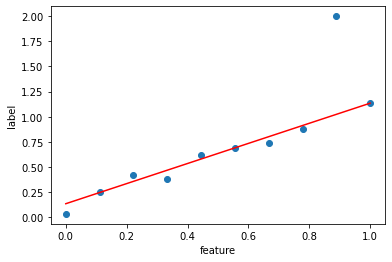

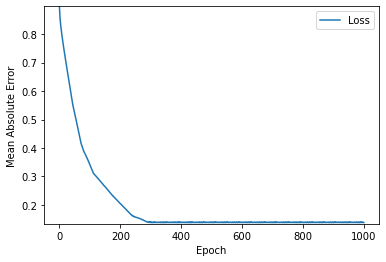

[[1.000401]]
[0.134529]
0.13809773325920105


In [20]:
learning_rate=0.005
epochs=1000
my_batch_size=10

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, mae = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, mae)

print(trained_weight)
print(trained_bias)
print(mae.values[-1])